In [8]:
import matplotlib.pyplot as plt
import json
import ast

with open("./report.txt", "r") as f:
    text=f.read().split("\n")

dict_arr= [ast.literal_eval(strv) for strv in text]

In [10]:
fracs = [dictv["k_frac"] for dictv in dict_arr]
forgs = [dictv["Forg_Accuracy"] for dictv in dict_arr]
utils = [dictv["Util_Accuracy"] for dictv in dict_arr]

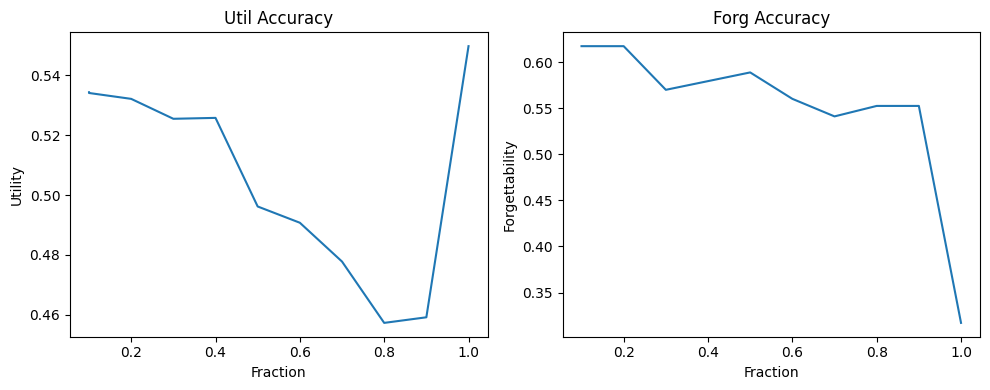

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].plot(fracs, utils)
ax[0].set_title("Util Accuracy")
ax[0].set_xlabel("Fraction")
ax[0].set_ylabel("Utility")

ax[1].plot(fracs, forgs)
ax[1].set_title("Forg Accuracy")
ax[1].set_xlabel("Fraction")
ax[1].set_ylabel("Forgettability")

plt.tight_layout()
plt.show()